In [260]:
# Data Exploration of a sample sales dataset
# Dataset: https://www.kaggle.com/kyanyoga/sample-sales-data
# Importing the Libraries


import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns

import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# Reading the Database

df = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')

In [47]:
# Previewing the Database 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [21]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [22]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

ORDERNUMBER - 0.0%
QUANTITYORDERED - 0.0%
PRICEEACH - 0.0%
ORDERLINENUMBER - 0.0%
SALES - 0.0%
ORDERDATE - 0.0%
STATUS - 0.0%
QTR_ID - 0.0%
MONTH_ID - 0.0%
YEAR_ID - 0.0%
PRODUCTLINE - 0.0%
MSRP - 0.0%
PRODUCTCODE - 0.0%
CUSTOMERNAME - 0.0%
PHONE - 0.0%
ADDRESSLINE1 - 0.0%
ADDRESSLINE2 - 0.8930216082182075%
CITY - 0.0%
STATE - 0.526390364860078%
POSTALCODE - 0.026921714488133193%
COUNTRY - 0.0%
TERRITORY - 0.3804463336875664%
CONTACTLASTNAME - 0.0%
CONTACTFIRSTNAME - 0.0%
DEALSIZE - 0.0%


In [23]:
# The columns ADDRESSLINE2, STATE, POSTALCODE and TERRITORY have some missing values.

In [262]:
# Data cleaning - converting datetime to date

df['ORDERDATE'] = pd.to_datetime(df["ORDERDATE"]).dt.date

In [84]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [271]:
# Getting General Insights

print( 'First order date:', df['ORDERDATE'].min() )
print( 'Last order date:', df['ORDERDATE'].max() )
print( 'Total sales:', df['SALES'].sum() )
print( 'Number of items sold:', df['QUANTITYORDERED'].sum() )
print( 'Number of orders:', df['ORDERNUMBER'].nunique() )
print( 'Average order value:', ( df['SALES'].sum() / df['ORDERNUMBER'].nunique() ).round(2) )
print( 'Average order quantity:', ( df['QUANTITYORDERED'].sum() / df['ORDERNUMBER'].nunique() ).round() )
print( 'Number of unique products in the catalogue sold:', df['PRODUCTCODE'].nunique() )
print( 'Number of unique product lines in the catalogue sold:', df['PRODUCTLINE'].nunique() )
print( 'Number of unique countries where orders were placed:', df['COUNTRY'].nunique() )
print( 'Number of unique customers who made a purchase:', df['CUSTOMERNAME'].nunique() )

First order date: 2003-01-06
Last order date: 2005-05-31
Total sales: 10032628.85
Number of items sold: 99067
Number of orders: 307
Average order value: 32679.57
Average order quantity: 323.0
Number of unique products in the catalogue sold: 109
Number of unique product lines in the catalogue sold: 7
Number of unique countries where orders were placed: 19
Number of unique customers who made a purchase: 92


In [ ]:
# Conclusions:

# Database represents roughly 2 years and 4 months of sales data.
# During this period:
# - The company generated ~10M in Sales, split in 307 orders, placed on 19 different countries, and served 92 unique customers.
# - There were 7 active product lines and 109 unique products were sold.
# - Each order had an average value of ~32.7k and an average quantity of 323 units.

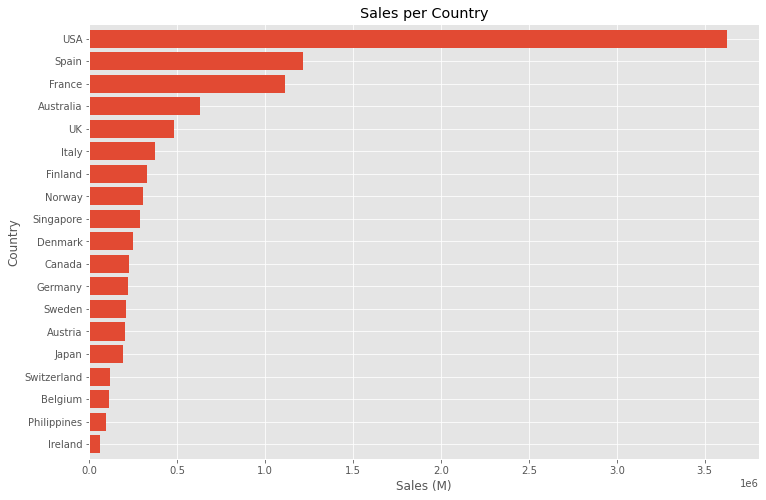

In [252]:
# Finding the Total Sales per Country

df_salary_country = df.groupby('COUNTRY').sum().sort_values('SALES')['SALES']
df_salary_country.plot.barh(y='COUNTRY', x='SALES', width = 0.8)
plt.xlabel("Sales (M)")
plt.ylabel("Country")
plt.title("Sales per Country")
plt.show()

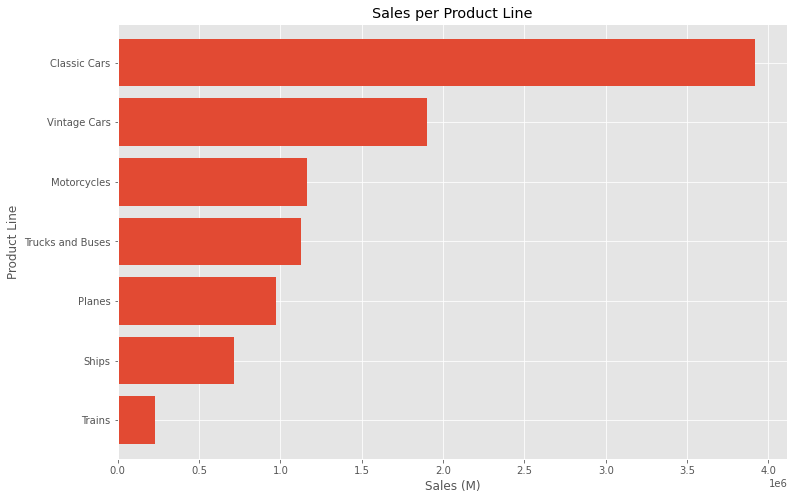

In [253]:
# Finding the Total Sales per Product Line

df_salary_pline = df.groupby('PRODUCTLINE').sum().sort_values('SALES')['SALES']
df_salary_pline.plot.barh(y='PRODUCTLINE', x='SALES', width = 0.8)
plt.xlabel("Sales (M)")
plt.ylabel("Product Line")
plt.title("Sales per Product Line")
plt.show()

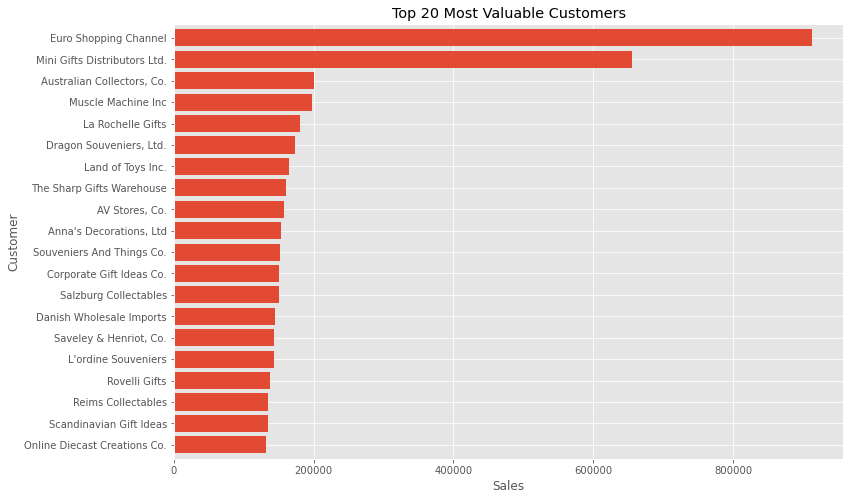

In [254]:
# Finding the Top 20 Most Valuable Customers

df_top10_customers = df.groupby('CUSTOMERNAME').sum().sort_values('SALES', ascending=False).head(20).sort_values('SALES')['SALES']
df_top10_customers.plot.barh(y='CUSTOMERNAME', x='SALES', width = 0.8)
plt.xlabel("Sales")
plt.ylabel("Customer")
plt.title("Top 20 Most Valuable Customers")
plt.show()

In [159]:
# Finding which variables affect Sales

df.corr()['SALES']

ORDERNUMBER        0.039919
QUANTITYORDERED    0.551426
PRICEEACH          0.657841
ORDERLINENUMBER   -0.058400
SALES              1.000000
QTR_ID            -0.006796
MONTH_ID          -0.009605
YEAR_ID            0.035647
MSRP               0.635239
Name: SALES, dtype: float64

In [ ]:
# Naturally, the price of an item, its MSRP and quantity ordered are correlated with sales. 
# But there are other non-numeric variables that could be correlated to sales as well.
# These variables need to be converted to numeric values.

# HYPOTHESIS 1: The location of where an order was placed and the customer who placed the order are correlated with sales

In [164]:
#Converting all data columns to numerical values

df_2 = df.copy()

for col_name in df_2.columns:
    if(df_2[col_name].dtype=='object'):
        df_2[col_name] = df_2[col_name].astype('category')
        df_2[col_name] = df_2[col_name].cat.codes

df_2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,112,5,1,2,2003,...,57,-1,42,9,0,18,-1,76,36,2
1,10121,34,81.35,5,2765.90,185,5,2,5,2003,...,40,-1,56,-1,27,6,1,28,54,2
2,10134,41,94.74,2,3884.34,204,5,3,7,2003,...,21,-1,52,-1,41,6,1,17,11,1
3,10145,45,83.26,6,3746.70,226,5,3,8,2003,...,54,-1,53,1,49,18,-1,75,31,1
4,10159,49,100.00,14,5205.27,23,5,4,10,2003,...,51,-1,59,1,-1,18,-1,8,31,1


In [165]:
df_2.corr()['SALES']

ORDERNUMBER         0.039919
QUANTITYORDERED     0.551426
PRICEEACH           0.657841
ORDERLINENUMBER    -0.058400
SALES               1.000000
ORDERDATE           0.007689
STATUS             -0.004828
QTR_ID             -0.006796
MONTH_ID           -0.009605
YEAR_ID             0.035647
PRODUCTLINE        -0.160354
MSRP                0.635239
PRODUCTCODE        -0.335955
CUSTOMERNAME        0.015363
PHONE               0.007178
ADDRESSLINE1       -0.016890
ADDRESSLINE2        0.020657
CITY                0.017282
STATE              -0.004215
POSTALCODE         -0.004850
COUNTRY             0.022396
TERRITORY          -0.001135
CONTACTLASTNAME    -0.001666
CONTACTFIRSTNAME    0.004714
DEALSIZE           -0.862814
Name: SALES, dtype: float64

In [212]:
# Deal size is strongly correlated with sales; Larger deals generate higher sales than smaller deals
# Product code and product line are somewhat correlated with sales; certain products and product lines generate higher sales than others

# HYPOTHESIS 1 was false, as neither country, territory and customer name are correlated with sales

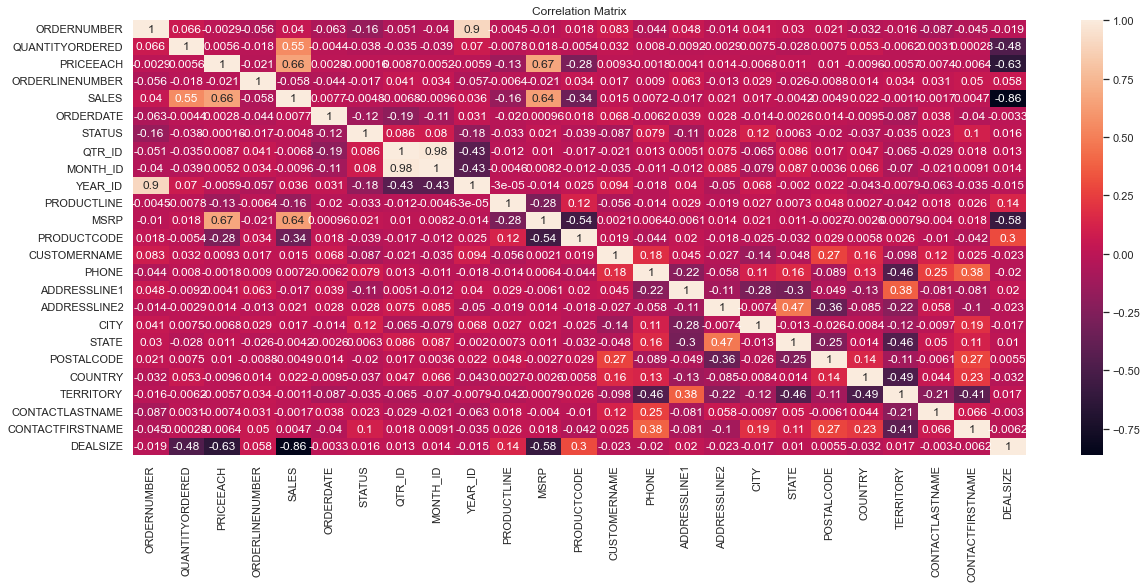

In [259]:
# Finding if there are other variables correlated with each other

sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(df_2.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [237]:
# Conclusion: There are no relevant correlations between other variables.

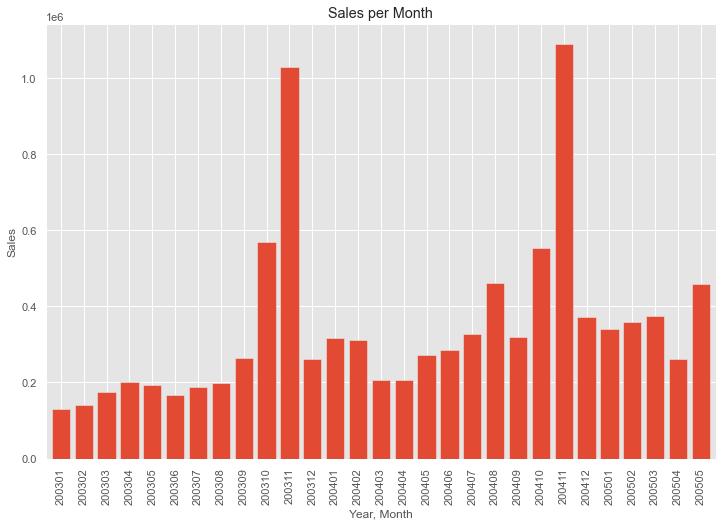

In [315]:
# Finding if there's sales seasonality

df['YEAR_MONTH'] = pd.to_datetime(df['ORDERDATE']).dt.strftime('%Y%m')
df_sales_by_month = df.groupby('YEAR_MONTH').sum().sort_values('YEAR_MONTH')['SALES']
df_sales_by_month.plot.bar(y='SALES', x='YEAR_MONTH', width = 0.8)
plt.xlabel("Year, Month")
plt.ylabel("Sales")
plt.title("Sales per Month")
plt.show()

In [ ]:
# Conclusion: Peak sales season is during the months of October and November.